# Cheatsheet Metodi Iterativi

## Equazione di Posson
L'equazione di Poisson è una PDE Ellittica della forma

$$\nabla^2 V = f$$

Dove $f = -\rho/\epsilon_0$, con $\rho$ densità di carica (nel nostro caso in 2D) ed $\epsilon_0$ costante dielettrica del vuoto.

### Approssimazione Centered Space delle Derivate Seconde
Ricordando l'approssimazione *centered space* per le derivate seconde

$$\frac{\partial^2 V}{\partial x^2} \approx \frac{V(x+dx) + V(x-dx) - 2V(x)}{h^2}$$

Che in griglia discreta diventa

$$\frac{\partial^2 V}{\partial x^2} \approx \frac{V_{i+1} + V_{i-1} - 2V_{i}}{h^2}$$

Dove $h$ rappresenta l'incremenro infinitesimo. Sfruttando questa relazione sviluppiamo l'operatore $\nabla^2$

$$
\begin{align}
\nabla^2 V = \left(\frac{\partial^2V}{\partial x^2} + \frac{\partial^2V}{\partial y^2}\right) 
&\approx \frac{V_{i+1, j} + V_{i-1, j} - 2V_{i, j}}{h^2} + \frac{V_{i, j+1} + V_{i, j-1} - 2V_{i,j}}{h^2}\\
&\approx \frac{V_{i+1, j} + V_{i-1, j} + V_{i, j+1} + V_{i, j-1} - 4V_{i,j}}{h^2} = f_{i,j}
\end{align}
$$

Riordinando in modo da esplicitare il termine *in place*

$$\boxed{V_{i,j} = \frac{1}{4}(V_{i+1, j} + V_{i-1, j} + V_{i, j+1} + V_{i, j-1} - h^2f_{i,j})}$$

## Metodo di Jacobi

Qua arriva la magia: consideriamo il termine a sinistra dell'equazione precedente come **appartentente ad un iterazione successiva**

$$V_{i,j}^{k+1} = \frac{1}{4}(V_{i+1, j}^{k} + V_{i-1, j}^{k} + V_{i, j+1}^{k} + V_{i, j-1}^{k} - h^2f_{i,j})$$

A questo punto **iteriamo** il metodo sino a che raggiungiamo la convergenza desiderata

$$|V_{i,j}^{k} - V_{i,j}^{k-1}| < \delta$$

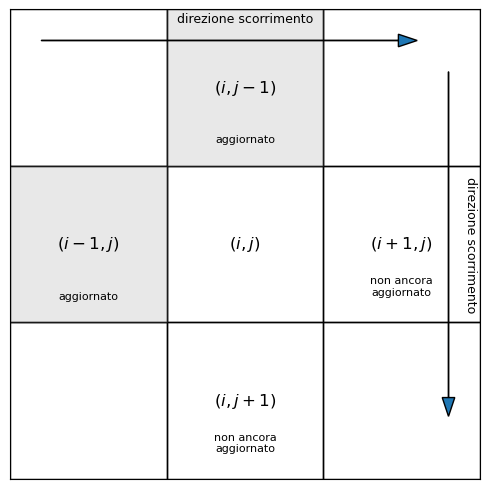

In [43]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

fig, ax = plt.subplots(figsize=(5, 5))

for x in range(3):
    for y in range(3):
        rect = Rectangle((x, y), 1, 1, fill=False)
        ax.add_patch(rect)

updated_points = [(0.5, 1.5),(1.5, 2.5)]
not_updated_points = [(2.5, 1.5),(1.5, 0.5)]

for (x, y) in updated_points:
    rect = Rectangle((x-0.5, y-0.5), 1, 1, facecolor='lightgray', alpha=0.5, edgecolor='black')
    ax.add_patch(rect)

ax.text(1.5, 1.5, r'$(i,j)$', ha='center', va='center', fontsize=12)
ax.text(1.5, 2.5, r'$(i,j-1)$', ha='center', va='center', fontsize=12)
ax.text(1.5, 0.5, r'$(i,j+1)$', ha='center', va='center', fontsize=12)
ax.text(0.5, 1.5, r'$(i-1,j)$', ha='center', va='center', fontsize=12)
ax.text(2.5, 1.5, r'$(i+1,j)$', ha='center', va='center', fontsize=12)


ax.text(1.5, 2.9, 'direzione scorrimento', ha='center', va='bottom', fontsize=9)
ax.text(2.9, 1.5, 'direzione scorrimento', rotation=270, va='center', fontsize=9)
ax.text(0.5, 1.2, 'aggiornato', ha='center', va='top', fontsize=8) 
ax.text(1.5, 2.2, 'aggiornato', ha='center', va='top', fontsize=8) 
ax.text(2.5, 1.3, 'non ancora\naggiornato', ha='center', va='top', fontsize=8)
ax.text(1.5, 0.3, 'non ancora\naggiornato', ha='center', va='top', fontsize=8)

ax.arrow(0.2, 2.8, 2.4, 0, length_includes_head=True, head_width=0.08, head_length=0.12)
ax.arrow(2.8, 2.6, 0, -2.2, length_includes_head=True, head_width=0.08, head_length=0.12)

ax.set_xlim(0, 3)
ax.set_ylim(0, 3)
ax.set_xticks([])
ax.set_yticks([])
ax.set_aspect('equal')

plt.tight_layout()
plt.show()

## Metodo di Gauss-Seidel
Come è possibile vedere nella figura di sopra, dato che per aggiornare i vari "settori" della griglia, scorriamo da valori minori di (i,j) a valori maggiori,  
i punti colorati in grigio **sono già aggiornati allo step (i,j)**: sfruttiamo questo fatto utilizzandoli nell'espressione per jacobi

$$V_{i,j}^{k+1} = \frac{1}{4}(V_{i+1, j}^{k} + \mathbf{V_{i-1, j}^{k+1}} + V_{i, j+1}^{k} + \mathbf{V_{i, j-1}^{k+1}} - h^2f_{i,j})$$

Questo semplice accorgimento accellera notevolmente la convergenza, il quale criterio non cambia rispetto a Jacobi

$$|V_{i,j}^{k} - V_{i,j}^{k-1}| < \delta$$

---

## Metodo SOR
Il metodo SOR (*Successive Over-Relaxation*) parte dalla consapevolezza che i metodi iterativi sono **estremamente lenti a convergere**, l'approccio proposto è quindi.  
di scalare per un fattore maggiore di 1 lo step verso la soluzione. Partiamo da Gauss-Seidel echiamiamo $\tilde{V}_{i,j}^{k+1}$ la soluzione di Gauss-Seidel dell'equazione di Poisson

$$\tilde{V}_{i,j}^{k+1} = V_{GS} = \frac{1}{4}(V_{i+1, j}^{k} + V_{i-1, j}^{k} + V_{i, j+1}^{k} + V_{i, j-1}^{k} - h^2f_{i,j})$$

Tale che

$$\delta_{GS} = \tilde{V}_{i,j}^{k+1} - V_{i,j}^{k}$$

Sia la distanza tra i valori del potenziale tra l'iterazione k e k+1.  
L’idea del SOR è: invece di sommare direttamente $V_{GS}$ al valore dell'iterazione precedente, introduciamo un parametro di rilassamento $\omega$,  
ed usiamolo come fattore moltiplicativo (vedi figura sotto), tale che

$$V_{i,j}^{k+1} = V_{i,j}^{k} + \delta_{GS} \to V_{i,j}^{k+1} = V_{i,j}^{k} + \mathbf{\omega}\delta_{GS}$$

Dove $V_{i,j}^{k+1}$ rappresenta il valore *vero* del potenziale allo step k+1.  
A questo punto sostituiamo $\delta_{GS}$ con il suo valore

$$V_{i,j}^{k+1} = V_{i,j}^{k} + \omega(\tilde{V}_{i,j}^{k+1} - V_{i,j}^{k})$$

E mettiamo a fattor comune il termine $V_{i,j}^{k}$

$$V_{i,j}^{k+1} = \omega \tilde{V}_{i,j}^{k+1} + (1 - \omega)V_{i,j}^{k}$$

Ricordando ora che $\tilde{V}_{i,j}^{k+1}$ non è altro che la soluzione di Gauss-Seide otteniamo finalmente

$$V_{i,j}^{k+1} = \omega V_{GS} + (1 - \omega)V_{i,j}^{k}$$

Ovvero l'espressione dell'algoritmo SOR.

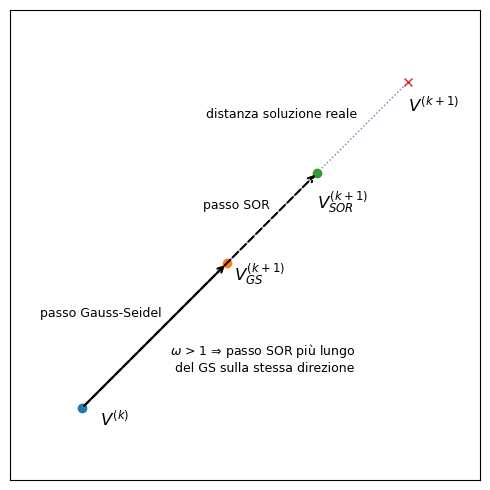

In [44]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(5, 5))

xk = (0.2, 0.2)
x_gs = (0.6, 0.6)
x_sor = (0.85, 0.85)
x_star = (1.1, 1.1)

ax.plot(xk[0], xk[1], marker='o')
ax.plot(x_gs[0], x_gs[1], marker='o')
ax.plot(x_sor[0], x_sor[1], marker='o')
ax.plot(x_star[0], x_star[1], marker='x')
ax.plot([xk[0], x_star[0]], [xk[1], x_star[1]], linestyle=":", linewidth=1)

ax.annotate("", xy=x_gs, xytext=xk, arrowprops=dict(arrowstyle="->", linewidth=1.5))
ax.annotate("", xy=x_sor, xytext=xk, arrowprops=dict(arrowstyle="->", linewidth=1.5, linestyle="--"))

ax.text((xk[0] + x_gs[0]) / 2 - 0.15, (xk[1] + x_gs[1]) / 2 + 0.05, "passo Gauss-Seidel", ha="center", fontsize=9)
ax.text((xk[0] + x_sor[0]) / 2 + 0.1, (xk[1] /2 + x_sor[1]) - 0.2, r"passo SOR", ha="center", fontsize=9)
ax.text((xk[0] + x_star[0]) / 2 + 0.1, (xk[1] /2 + x_star[1]) - 0.2, r"distanza soluzione reale", ha="center", fontsize=9)
ax.text(xk[0]+0.05, xk[1] - 0.05, r"$V^{(k)}$", fontsize=12)
ax.text(x_gs[0] + 0.02, x_gs[1]-0.05, r"$V^{(k+1)}_{GS}$", fontsize=12)
ax.text(x_sor[0], x_sor[1]-0.1, r"$V^{(k+1)}_{SOR}$", fontsize=12)
ax.text(x_star[0], x_star[1]-0.08, r"$V^{(k+1)}$", fontsize=12)
ax.text(0.7, 0.3, "$\\omega$ > 1 ⇒ passo SOR più lungo\n del GS sulla stessa direzione", ha="center", fontsize=9)

ax.set_xlim(0, 1.3)
ax.set_ylim(0, 1.3)
ax.set_aspect('equal')
ax.set_xticks([])
ax.set_yticks([])

plt.tight_layout()
plt.show()